# Reproducing the PNAS network version

In this notebook, we will go through the steps necessary to reproduce the exact network from the PNAS paper. The cbrain module has changed since, but the results should be the same.

In [2]:
from cbrain.imports import *
from cbrain.cam_constants import *
from cbrain.utils import *

## Preprocess the CAM data

First, we need to preprocess the CAM dataset. For the base version of the network we used one year of reference climate for training. The pp_config file is `002_8col_1year_train.yml`. I uploaded the raw data here: https://www.meteo.physik.uni-muenchen.de/~stephan.rasp/fluxbypass_aqua/

In [ ]:
!python preprocessing.py -c pp_config/002_8col_1year_train.yml

## Train the model

Now that we have the preprocessed file, we can train the neural network. The exact configuration with the correct normalization of inputs and outputs can be found in `nn_config/006_8col_pnas_exact.yml`

In [ ]:
!python train.py -c nn_config/006_8col_pnas_exact.yml

## Plot statistics

In [4]:
from cbrain.model_diagnostics import ModelDiagnostics

In [5]:
md = ModelDiagnostics('nn_config/006_8col_pnas_exact.yml', '/local/S.Rasp/preprocessed_data/001_valid.nc')

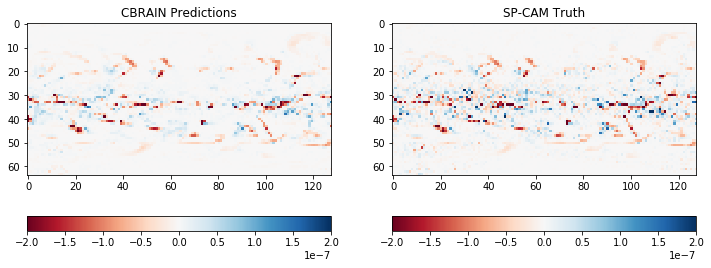

In [10]:
md.plot_double_xy(itime=0, ilev=20, var='PHQ', vmin=-2e-7, vmax=2e-7, cmap='RdBu');